# Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

# Parameter estimation by optimization

When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. We will find the optimal parameters, those that best describe your data.


## Optimal parameters


> ### Optimal parameters
- Parameter values that bring the model in closest agreement with the data

> ### Packages to do statistical inference
| |package|
|---|---|
|<img src="https://docs.scipy.org/doc/scipy/reference/_static/img/scipy_org_logo.png" alt="scipy_org_logo" width="250">|`scipy.stats`|
|<img src="https://www.statsmodels.org/stable/_images/statsmodels-logo-v2-horizontal.svg" alt="statsmodels-logo-v2-horizontal" width="250">|`statsmodels`|
|<img src="https://numpy.org/images/logos/numpy.svg" alt="numpy" style="height:50px">| hacker stats with `numpy`|


### How often do we get no-hitters?


The number of games played between each no-hitter in the modern era ($1901-2015$) of Major League Baseball is stored in the array `nohitter_times.`

In [2]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
                           715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
                           104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
                           166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
                           308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
                           1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
                           77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
                           557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
                           1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
                           219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
                           176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
                           774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
                           192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
                           156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
                           576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
                           3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
                           110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
                           192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
                           1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
                           2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
                           1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
                           420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
                           876,  381,  905,  156,  419,  239,  119,  129,  467])

If we assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As we have seen, the Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

We will compute the value of this parameter from the data. Then, `use np.random.exponential()` to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ we found and plot the histogram as an approximation to the PDF.

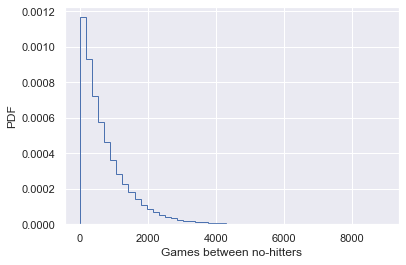

In [3]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype="step")
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


> Note: We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

### Do the data follow our story?

We have modeled no-hitters using an Exponential distribution. Let's create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps us to verify that the Exponential distribution describes the observed data.

In [6]:
def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

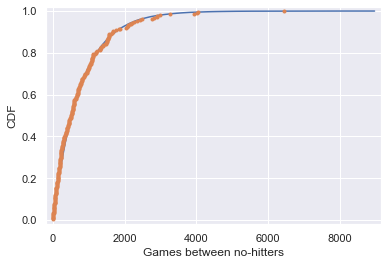

In [7]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker=".", linestyle="none")

# Margins and axis labels
plt.margins(.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()


It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

# How is this parameter optimal?

We will now sample out of an exponential distribution with $\tau$ being twice as large as the optimal $\tau$. Do it again for $\tau$ half as large. Make CDFs of these samples and overlay them with our data. 

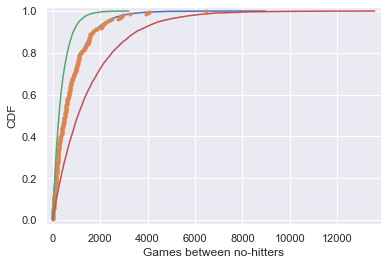

In [8]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

> Note: Notice how the value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.

We can see that they do not reproduce the data as well. Thus, the $\tau$ we computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

## Linear regression by least squares


> ### Least squares
- The process of nding the parameters for which the sum ofthe squares ofthe residuals is minimal

### EDA of literacy/fertility data

we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

In [9]:
illiteracy= np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
                      6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
                      1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
                      0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
                      10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
                      32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
                      81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
                      1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
                      2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
                      11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
                      8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
                      0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
                      4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
                      14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
                      3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])

In [13]:
fertility = np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

It is always a good idea to do some EDA ahead of our analysis. To this end, we will plot the `fertility` versus `illiteracy` and compute the Pearson correlation coefficient. 


> Note: The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. 


> Note: The array `fertility` has the corresponding fertility data.

In [14]:
def pearson_r(x, y):
    return np.corrcoef(x, y)[0,1]

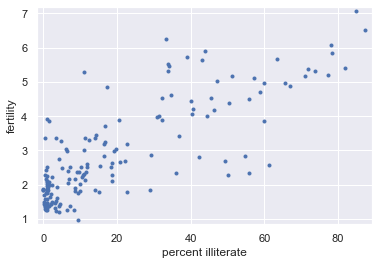

0.8041324026815346

In [15]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
pearson_r(illiteracy, fertility)


We can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

### Linear regression

We will assume that fertility is a linear function of the female illiteracy rate. That is, $f=ai+b$, where $a$ is the **slope** and $b$ is the **intercept**.


> Note: We can think of the intercept as the minimal fertility rate, probably somewhere between one and two.


The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using `np.polyfit()`.

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.8880506106365562 children per woman


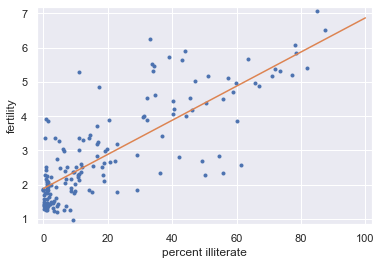

In [16]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, deg=1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


### How is it optimal?

The function `np.polyfit()` that we used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS ( _for residual sum of squares_ ). 

We will plot the function that is being optimized, the RSS, versus the slope parameter $a$. To do this, we will fix the intercept to be what we found in the optimization. Then, plot the RSS vs. the slope. 

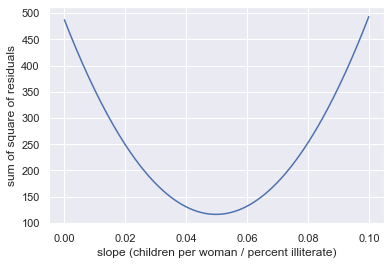

In [17]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0,0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()


> Note: that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.




## The importance of EDA: Anscombe's quartet

> ### Look before you leap!
- Do graphical EDA rst

### Linear regression on appropriate Anscombe data

We will perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [19]:
x = np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
y = np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
        4.82,  5.68])

0.5000909090909091 3.000090909090908


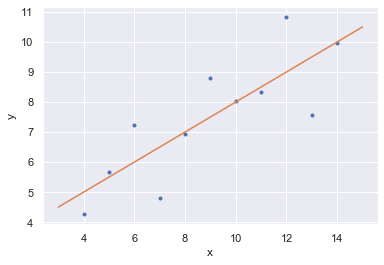

In [20]:
# Perform linear regression: a, b
a, b = np.polyfit(x,y, deg=1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker=".", linestyle="none")
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

### Linear regression on all Anscombe data


Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, we will compute the slope and intercept for each set. 

In [22]:
anscombe_x = [np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.])]

In [23]:
anscombe_y = [np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68]),
 np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74]),
 np.array([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15,
         6.42,  5.73]),
 np.array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,
         7.91,  6.89])]

The data are stored in lists;

In [24]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y, deg=1)

    # Print the result
    print('slope:', a, 'intercept:', b)


slope: 0.5000909090909091 intercept: 3.000090909090908
slope: 0.5 intercept: 3.0009090909090905
slope: 0.4997272727272729 intercept: 3.002454545454545
slope: 0.4999090909090908 intercept: 3.001727272727274


> Important: Indeed, they all have the same slope and intercept.

# Bootstrap confidence intervals

To "pull yourself up by your bootstraps" is a classic idiom meaning that you achieve a difficult task by yourself with no help at all. In statistical inference, we want to know what would happen if we could repeat our data acquisition an infinite number of times. This task is impossible, but can we use only the data we actually have to get close to the same result as an infinitude of experiments? The answer is yes! The technique to do it is aptly called ***bootstrapping***. 

## Generating bootstrap replicates


> ### Bootstrapping
- The use of resampled data to perform statistical inference


> ### Bootstrap sample
- A resampled array ofthe data


> ### Bootstrap replicate
- A statistic computed from a resampled array

### Getting the terminology down


If we have a data set with $n$ repeated measurements, a **bootstrap sample** is an array of length $n$ that was drawn from the original data with replacement. **bootstrap replicate** is A single value of a statistic computed from a bootstrap sample.

### Visualizing bootstrap samples


We will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. 

In [25]:
rainfall = np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])

The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, we can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

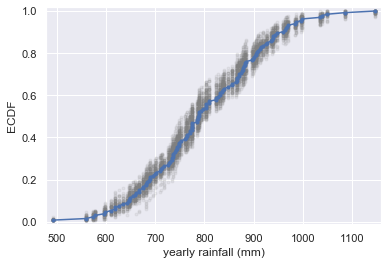

In [26]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

> Note: The bootstrap samples give an idea of how the distribution of rainfalls is spread.

## Bootstrap confidence intervals


> ### Condence interval of a statistic
- If we repeated measurements over and over again, $p\%$ of the observed values would lie within the $p\%$ condence interval.

### Generating many bootstrap replicates




In [29]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    return func(np.random.choice(data, size=len(data)))

We'll write another function, `draw_bs_reps(data, func, size=1)`, which generates many bootstrap replicates from the data set. 

In [30]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


### Bootstrap replicates of the mean and the SEM

We will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. 


> Note: we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a _probabilistic_ estimate of the mean. 


We will plot the PDF as a histogram, and you will see that it is Normal.

The standard deviation of this distribution, called the **standard error of the mean**, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, `sem = np.std(data) / np.sqrt(len(data))`.

10.510549150506188
10.520579005911742


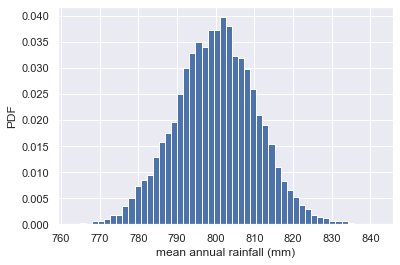

In [32]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

> Note: SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

### Confidence intervals of rainfall data


A _confidence interval_ gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, we can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that we can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, we can use the `np.percentile()` function.

In [33]:
np.percentile(bs_replicates, [2.5, 97.5])

array([779.32073308, 820.70253759])

it's simple to get confidence intervals using bootstrap!

### Bootstrap replicates of other statistics


We'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

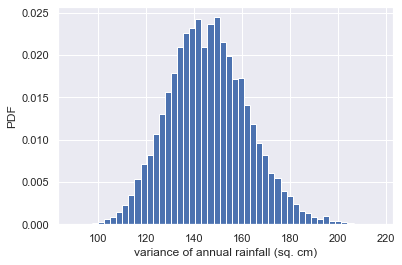

In [35]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, density=True, bins=50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

> Note: This is not normally distributed, as it has a longer tail to the right.

### Confidence interval on the rate of no-hitters

95% confidence interval = [664.12699203 869.06005976] games


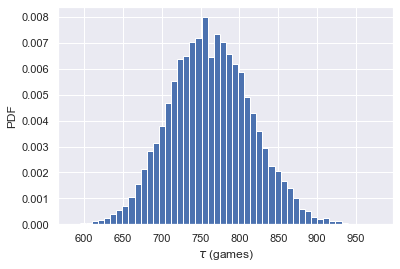

In [37]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


> Note: This gives us an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

## Pairs bootstrap


> ### Nonparametric inference
- Make no assumptions about the model or probability distribution underlying the data


> ### Pairs bootstrap for linear regression
- Resample data in pairs
- Compute slope and intercept from resampled data
- Each slope and intercept is a bootstrap replicate
- Compute condence intervals from percentiles of bootstrap replicates